### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [3]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

This is the equivalent of asking what is n so that we have a 15% probability to having no defective products therefore: 

(1-wanted_probability) = (1 - probability_being_defective )^n

n = log(1-wanted_probability) / log(1 - probability_being_defective)


In [ ]:
n = np.log(1-0.85)/np.log(1-0.03)
np.ceil(n)

63.0

In [ ]:
 # since a function was requested:
def A1(wanted_probability = 0.85,probability_defective = 0.03):
  flag = False
  i=0
  while (flag== False) :
    i=i+1
    if ( 1-wanted_probability > (1-probability_defective)**i ):
      flag = True

  return i


A1()

63

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [ ]:
A1(0.95,0.04)

74

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [ ]:
C1 = scipy.stats.nbinom(p=0.1,n=5)
C1.ppf(q=0.9)+5




78.0

In [ ]:
C2 = scipy.stats.nbinom(p=0.3,n=15)
C2.ppf(0.9)+15


64.0

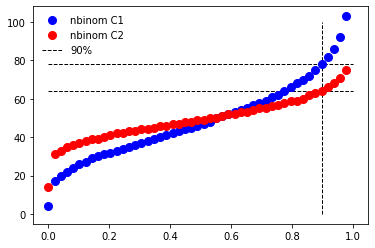

First case variance =  0.6172839506172839
Second case variance =  9.183673469387756
Negative binomial distribution variance is pr/(1-p)^2, therefore the farther 


In [ ]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,1.0,num=50)
ax.plot(x, scipy.stats.nbinom.ppf(x, n=5, p=0.1)+5, 'bo', ms=8, label='nbinom C1')
ax.plot(x, scipy.stats.nbinom.ppf(x, n=15, p=0.3)+15, 'ro', ms=8, label='nbinom C2')

ax.vlines(0.9, 0, 100, colors='k', linestyles='--', lw=1,
        label='90%')
ax.hlines(78, 0, 1, colors='k', linestyles='--', lw=1)
ax.hlines(64, 0, 1, colors='k', linestyles='--', lw=1)

ax.legend(loc='best', frameon=False)

plt.show()

print("First case variance = ",5*0.1/(1-0.1)**2)
print("Second case variance = ",15*0.3/(1-0.3)**2)
print("Negative binomial distribution variance is pr/(1-p)^2")
print("Therefore case 2 has a much higher variance than case 1")

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

SH1 median =  4600.0
SH1 mean =  6300.0
SH1 IQR =  3800.0
SH2 median =  4600.0
SH2 mean =  6300.0
SH2 IQR =  3800.0
RG1 median  =  4600.0
RG1 mean =  4200.0
RG1 IQR =  4300.0
RG2 median  =  4600.0
RG2 mean =  4200.0
RG2 IQR =  4300.0


Text(0.5, 1.0, 'RG2')

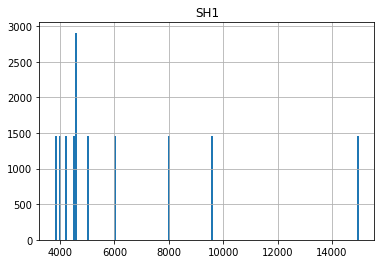

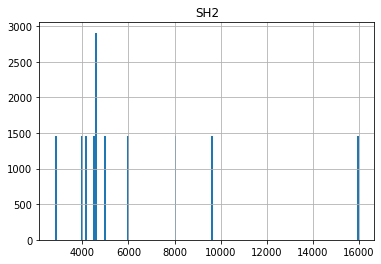

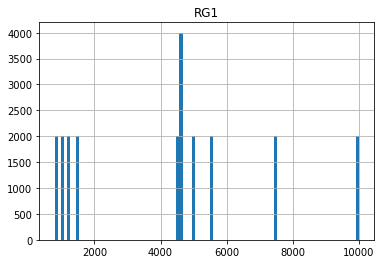

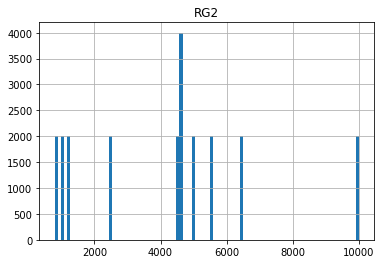

In [4]:
n_sh = 16000
n_rg = 22000
target_mu_sh = 6300
target_mu_rg = 4200
target_median = 4600

sh1 = np.array(int(n_sh/11)*[3800,4000,4200,4500,4600,4600,5000,6000,8000,9600,15000])
print("SH1 median = " , np.median(sh1))
print("SH1 mean = " , np.mean(sh1))
print("SH1 IQR = ",np.percentile(sh1,75)-np.percentile(sh1,25))
pd.DataFrame(sh1).hist(bins=150)
plt.title("SH1")

sh2 = np.array(int(n_sh/11)*[2800,4000,4200,4500,4600,4600,5000,6000,8000,9600,16000])
print("SH2 median = " , np.median(sh2))
print("SH2 mean = " , np.mean(sh2))
print("SH2 IQR = ",np.percentile(sh2,75)-np.percentile(sh2,25))
pd.DataFrame(sh2).hist(bins=160)
plt.title("SH2")



rg1 = np.array(int(n_rg/11)*[800,1000,1200,1500,4600,4600,4500,5000,5500,7500,10000])
print("RG1 median  = ",np.median(rg1))
print("RG1 mean = ",np.mean(rg1))
print("RG1 IQR = ",np.percentile(rg1,75)-np.percentile(rg1,25))
pd.DataFrame(rg1).hist(bins=100)
plt.title("RG1")

rg2 = np.array(int(n_rg/11)*[800,1000,1200,2500,4600,4600,4500,5000,5500,6500,10000])
print("RG2 median  = ",np.median(rg2))
print("RG2 mean = ",np.mean(rg2))
print("RG2 IQR = ",np.percentile(rg2,75)-np.percentile(rg2,25))
pd.DataFrame(rg2).hist(bins=100)
plt.title("RG2")




#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

10565454.545454545
7760000.0
checking if var(sh1)>var(rg1)
True



SH3 median =  4600.0
SH3 mean =  6300.0
SH3 IQR =  3800.0
RG3 median  =  4600.0
RG3 mean =  4200.0
RG3 IQR =  4300.0
checking if var(sh3)>var(rg3)


True

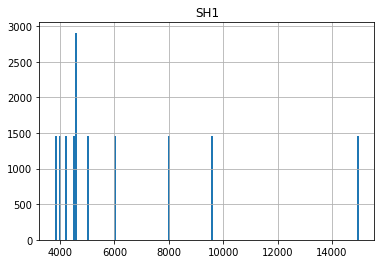

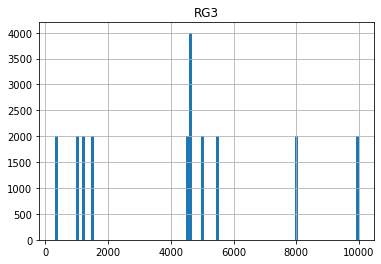

In [34]:
print(np.var(sh1))
print(np.var(rg1))
print("checking if var(sh1)>var(rg1)")
print(np.var(sh1)>np.var(rg1))

print("")
print("")
print("")


# in case a third scenario is nessesarry
sh3 = np.array(int(n_sh/11)*[3000,4000,4200,4500,4600,4600,5000,6000,8000,10400,15000])
print("SH3 median = " , np.median(sh3))
print("SH3 mean = " , np.mean(sh3))
print("SH3 IQR = ",np.percentile(sh3,75)-np.percentile(sh3,25))
pd.DataFrame(sh1).hist(bins=150)
plt.title("SH1")

rg3 = np.array(int(n_rg/11)*[300,1000,1200,1500,4600,4600,4500,5000,5500,8000,10000])
print("RG3 median  = ",np.median(rg3))
print("RG3 mean = ",np.mean(rg3))
print("RG3 IQR = ",np.percentile(rg3,75)-np.percentile(rg3,25))
pd.DataFrame(rg3).hist(bins=100)
plt.title("RG3")

print("checking if var(sh3)>var(rg3)")
np.var(sh3)>np.var(rg3)


The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [6]:
target_phi_mean_sh = 12500
target_phi_median_sh = 12000


#sh = np.array(int(n_sh/11)*[3800,4000,4200,4500,4600,4600,5000,6000,8000,9600,15000])
phi_sh = np.array(int(n_sh/11)*[3500,7000,8000,9000,10000,12000,12000,12000,16000,18000,30000])

print("Mean PHI in SH = ",np.mean(phi_sh))
print("Median PHI in SH = ",np.median(phi_sh))

target_phi_mean_rg = 8500
target_phi_median_rg = 8000

#rg1 = np.array(int(n_rg/11)*[800,1000,1200,1500,4600,4600,4500,5000,5500,7500,10000])
phi_rg = np.array(int(n_rg/11)*[4000,5000,6000,6000,7000,8000,11000,11000,11000,12000,12500])

print("Mean PHI in RP = ",np.mean(phi_rg))
print("Median PHI in RP = ",np.median(phi_rg))

target_cov_sh = 0.97*(np.var(phi_sh)**0.5)*(np.var(sh1)**0.5)
print("target cov for SH = ",target_cov_sh)

target_cov_rg = 0.89*(np.var(phi_rg)**0.5)*(np.var(rg1)**0.5)
print("target cov for RG = ",target_cov_rg)

cov_sh = np.cov(sh1,phi_sh)[0,1]
print(cov_sh/target_cov_sh)

cov_rg = np.cov(rg1,phi_rg)[0,1]
print(cov_rg/target_cov_rg)


Mean PHI in SH =  12500.0
Median PHI in SH =  12000.0
Mean PHI in RP =  8500.0
Median PHI in RP =  8000.0
target cov for SH =  21246491.84479037
target cov for RG =  7266753.507960385
0.9976602253222318
1.00962515304248


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

Text(0, 0.5, 'PHI')

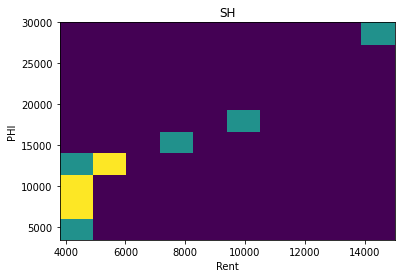

In [10]:
plt.hist2d(x=sh1 , y=phi_sh , bins=10)
plt.title("SH")
plt.xlabel("Rent")
plt.ylabel("PHI")




Text(0, 0.5, 'PHI')

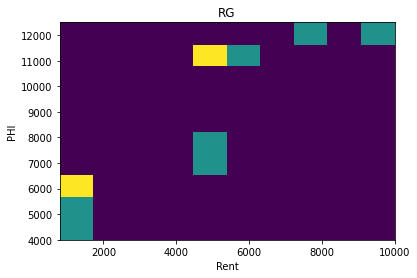

In [11]:
plt.hist2d(x=rg1 , y=phi_rg , bins=10)
plt.title("RG")
plt.xlabel("Rent")
plt.ylabel("PHI")

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [14]:

P1 = [[1,2,3,4,5,6],[1.0/6 for i in range(6)]]



def NFoldConv(P=P1,n=2):
  if(n<=0):
    return {}
  
  Q={} # output dictionary
  length = len(P[0])
  if (n>1):
    Q_before = NFoldConv(P,n-1)
    # set as zeros
    for i in Q_before:
      for j in range(length):
        Q[P[0][j]+i] = 0
    # add the option
    for i in Q_before: # dictionary
      for j in range(length): #current arr
        Q[P[0][j]+i] += P[1][j]*Q_before[i]
  # the first dist -> change into dictionary format
  else:
      for i in range(length):
        Q[P[0][i]] = P[1][i]
  return Q

NFoldConv(P1,2)



{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666669,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}

#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [ ]:
P2 = [[1,2,3,4,5,6,7,8],[1.0/8.0 for i in range(8)]]
NFoldConv(P2,17)

{17: 4.440892098500626e-16,
 18: 7.549516567451064e-15,
 19: 6.794564910705958e-14,
 20: 4.303224443447107e-13,
 21: 2.1516122217235534e-12,
 22: 9.036771331238924e-12,
 23: 3.313482821454272e-11,
 24: 1.088715784192118e-10,
 25: 3.2660718574106795e-10,
 26: 9.07134811711785e-10,
 27: 2.3577291230481023e-09,
 28: 5.782673007104222e-09,
 29: 1.3473395732432891e-08,
 30: 2.998400727705075e-08,
 31: 6.401734875538523e-08,
 32: 1.3161584089260714e-07,
 33: 2.613809253482202e-07,
 34: 5.027422242953605e-07,
 35: 9.38663699212583e-07,
 36: 1.7045993589981379e-06,
 37: 3.015970226893927e-06,
 38: 5.206881849684208e-06,
 39: 8.783168114145923e-06,
 40: 1.449303744882613e-05,
 41: 2.3418493098503745e-05,
 42: 3.7090165106334894e-05,
 43: 5.762708941681183e-05,
 44: 8.790117605705916e-05,
 45: 0.00013172354057466862,
 46: 0.0001940465160554794,
 47: 0.000281171099826949,
 48: 0.00040094502474907756,
 49: 0.0005629319236253316,
 50: 0.0007785276598544222,
 51: 0.0010609964316725673,
 52: 0.001425

#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

In [16]:
# After 2 days
P3 = [[-1,0,1,2,3],[0.3,0.15,0.15,0.15,0.25]]
NFoldConv(P3,2)

{-2: 0.09,
 -1: 0.09,
 0: 0.1125,
 1: 0.135,
 2: 0.21749999999999997,
 3: 0.12,
 4: 0.0975,
 5: 0.075,
 6: 0.0625}

In [17]:
# After 5 days
NFoldConv(P3,5)

{-5: 0.00243,
 -4: 0.006075,
 -3: 0.012149999999999998,
 -2: 0.021262499999999997,
 -1: 0.038221874999999995,
 0: 0.053738437499999986,
 1: 0.07074843749999998,
 2: 0.08720156249999998,
 3: 0.10407656249999997,
 4: 0.10719843749999998,
 5: 0.10638843749999999,
 6: 0.09968906249999998,
 7: 0.08860781249999998,
 8: 0.0683578125,
 9: 0.0517078125,
 10: 0.0363571875,
 11: 0.0233671875,
 12: 0.0120703125,
 13: 0.0064453125,
 14: 0.0029296875,
 15: 0.0009765625}

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.

In [ ]:
def gainedMoreThan(P,time,sum):
  Q = NFoldConv(P,time)
  count =0
  for i in Q:
    if int(i)>sum:
      count+= Q[i]
  return count

def gainedLessThan(P,time,sum):
  Q = NFoldConv(P,time)
  count =0
  for i in Q:
    if i<sum:
      count+= Q[i]
  return count

print("Gained more than 7 in 5 days",gainedMoreThan(P3,5,7))
# should be the same as the only option in distrubtion of Q[-5] = 0.00243 in this case
print("Lost more than 4 in 5 days",gainedLessThan(P3,5,-4)) 


gained more than 7 in 5 days 0.202211875
lost more than 4 in 5 days 0.00243
